https://www.kaggle.com/datasets/fedesoriano/the-boston-houseprice-data/code

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import glob
import statsmodels.api as smf
import seaborn as sns

In [ ]:
from google.colab import files


uploaded = files.upload()

Saving boston.csv to boston.csv


In [ ]:
df = pd.read_csv('boston.csv')
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
df.shape

(506, 14)

In [ ]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [ ]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
#checking for missing cells, none present
df.dropna(axis=1, inplace=True)
df.shape

(506, 14)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X = df.drop(columns=['MEDV'])
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 24.291119474973513
R-squared: 0.668759493535632


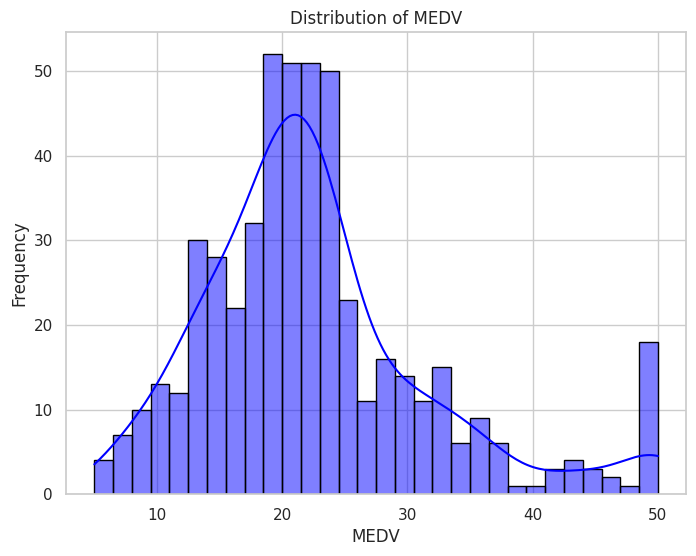

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histogram of 'MEDV' values
plt.figure(figsize=(8, 6))
sns.histplot(df['MEDV'], bins=30, kde=True, color='blue', edgecolor='black')
plt.title('Distribution of MEDV')
plt.xlabel('MEDV')
plt.ylabel('Frequency')
plt.show()

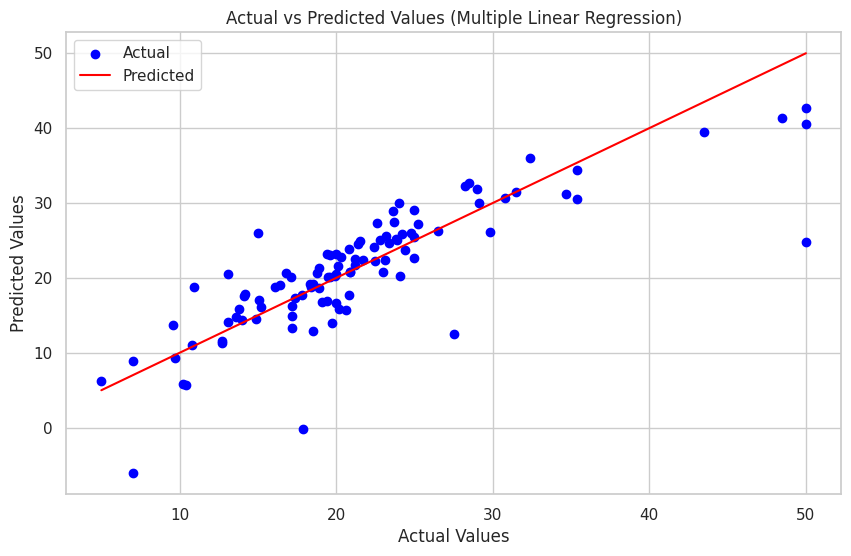

In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Predicted')  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Multiple Linear Regression)')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

k = 5

mse_scores = []
r2_scores = []

kf = KFold(n_splits=k, shuffle=True, random_state=42)

for train_index, val_index in kf.split(X_train):

    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    scaler = StandardScaler()
    X_train_fold_scaled = scaler.fit_transform(X_train_fold)
    X_val_fold_scaled = scaler.transform(X_val_fold)

    model = LinearRegression()
    model.fit(X_train_fold_scaled, y_train_fold)

    y_pred_fold = model.predict(X_val_fold_scaled)

    mse_fold = mean_squared_error(y_val_fold, y_pred_fold)
    r2_fold = r2_score(y_val_fold, y_pred_fold)

    mse_scores.append(mse_fold)
    r2_scores.append(r2_fold)


avg_mse = np.mean(mse_scores)
avg_r2 = np.mean(r2_scores)

print("Average Mean Squared Error across all folds:", avg_mse)
print("Average R-squared across all folds:", avg_r2)

Average Mean Squared Error across all folds: 24.318384047891506
Average R-squared across all folds: 0.7184784187192006


In [ ]:
correlation_matrix = df.corr()

# Get the correlation values of "MEDV" with other features
medv_corr = correlation_matrix['MEDV'].drop('MEDV')
top_5_related_features = medv_corr.abs().nlargest(5)

print("Top 5 features most related to 'MEDV':")
for feature, correlation in top_5_related_features.items():
    print(f"{feature}: {correlation}")

Top 5 features most related to 'MEDV':
LSTAT: 0.7376627261740145
RM: 0.6953599470715401
PTRATIO: 0.5077866855375623
INDUS: 0.48372516002837274
TAX: 0.4685359335677667


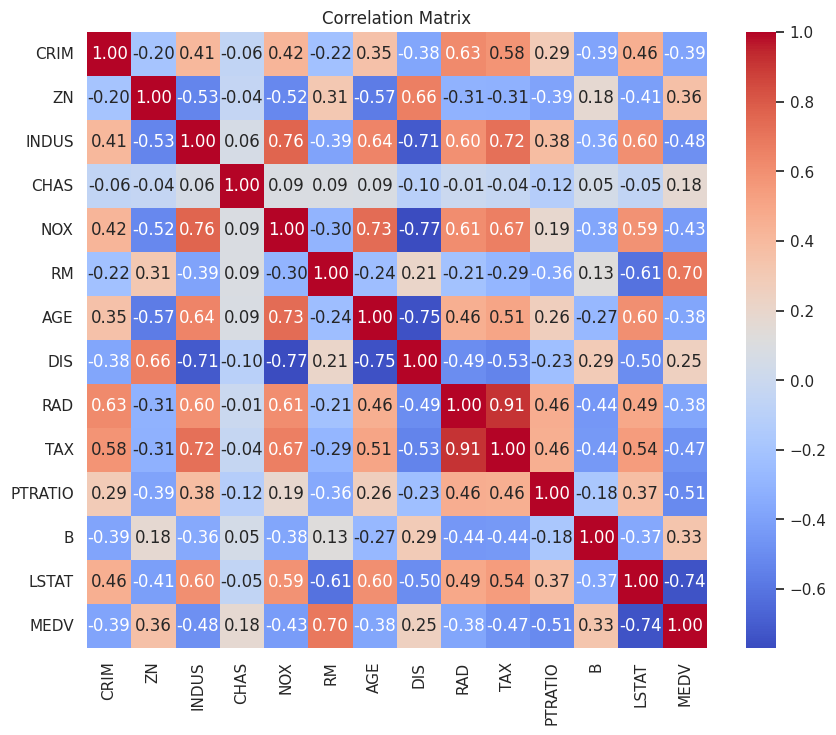

In [ ]:
#Correlation Analysis
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
correlation_matrix = df.corr()

# Extract correlations with MEDV
correlations_to_MEDV = correlation_matrix['MEDV'].sort_values(ascending=False)

print("Correlations with MEDV:")
print(correlations_to_MEDV)

Correlations with MEDV:
MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64


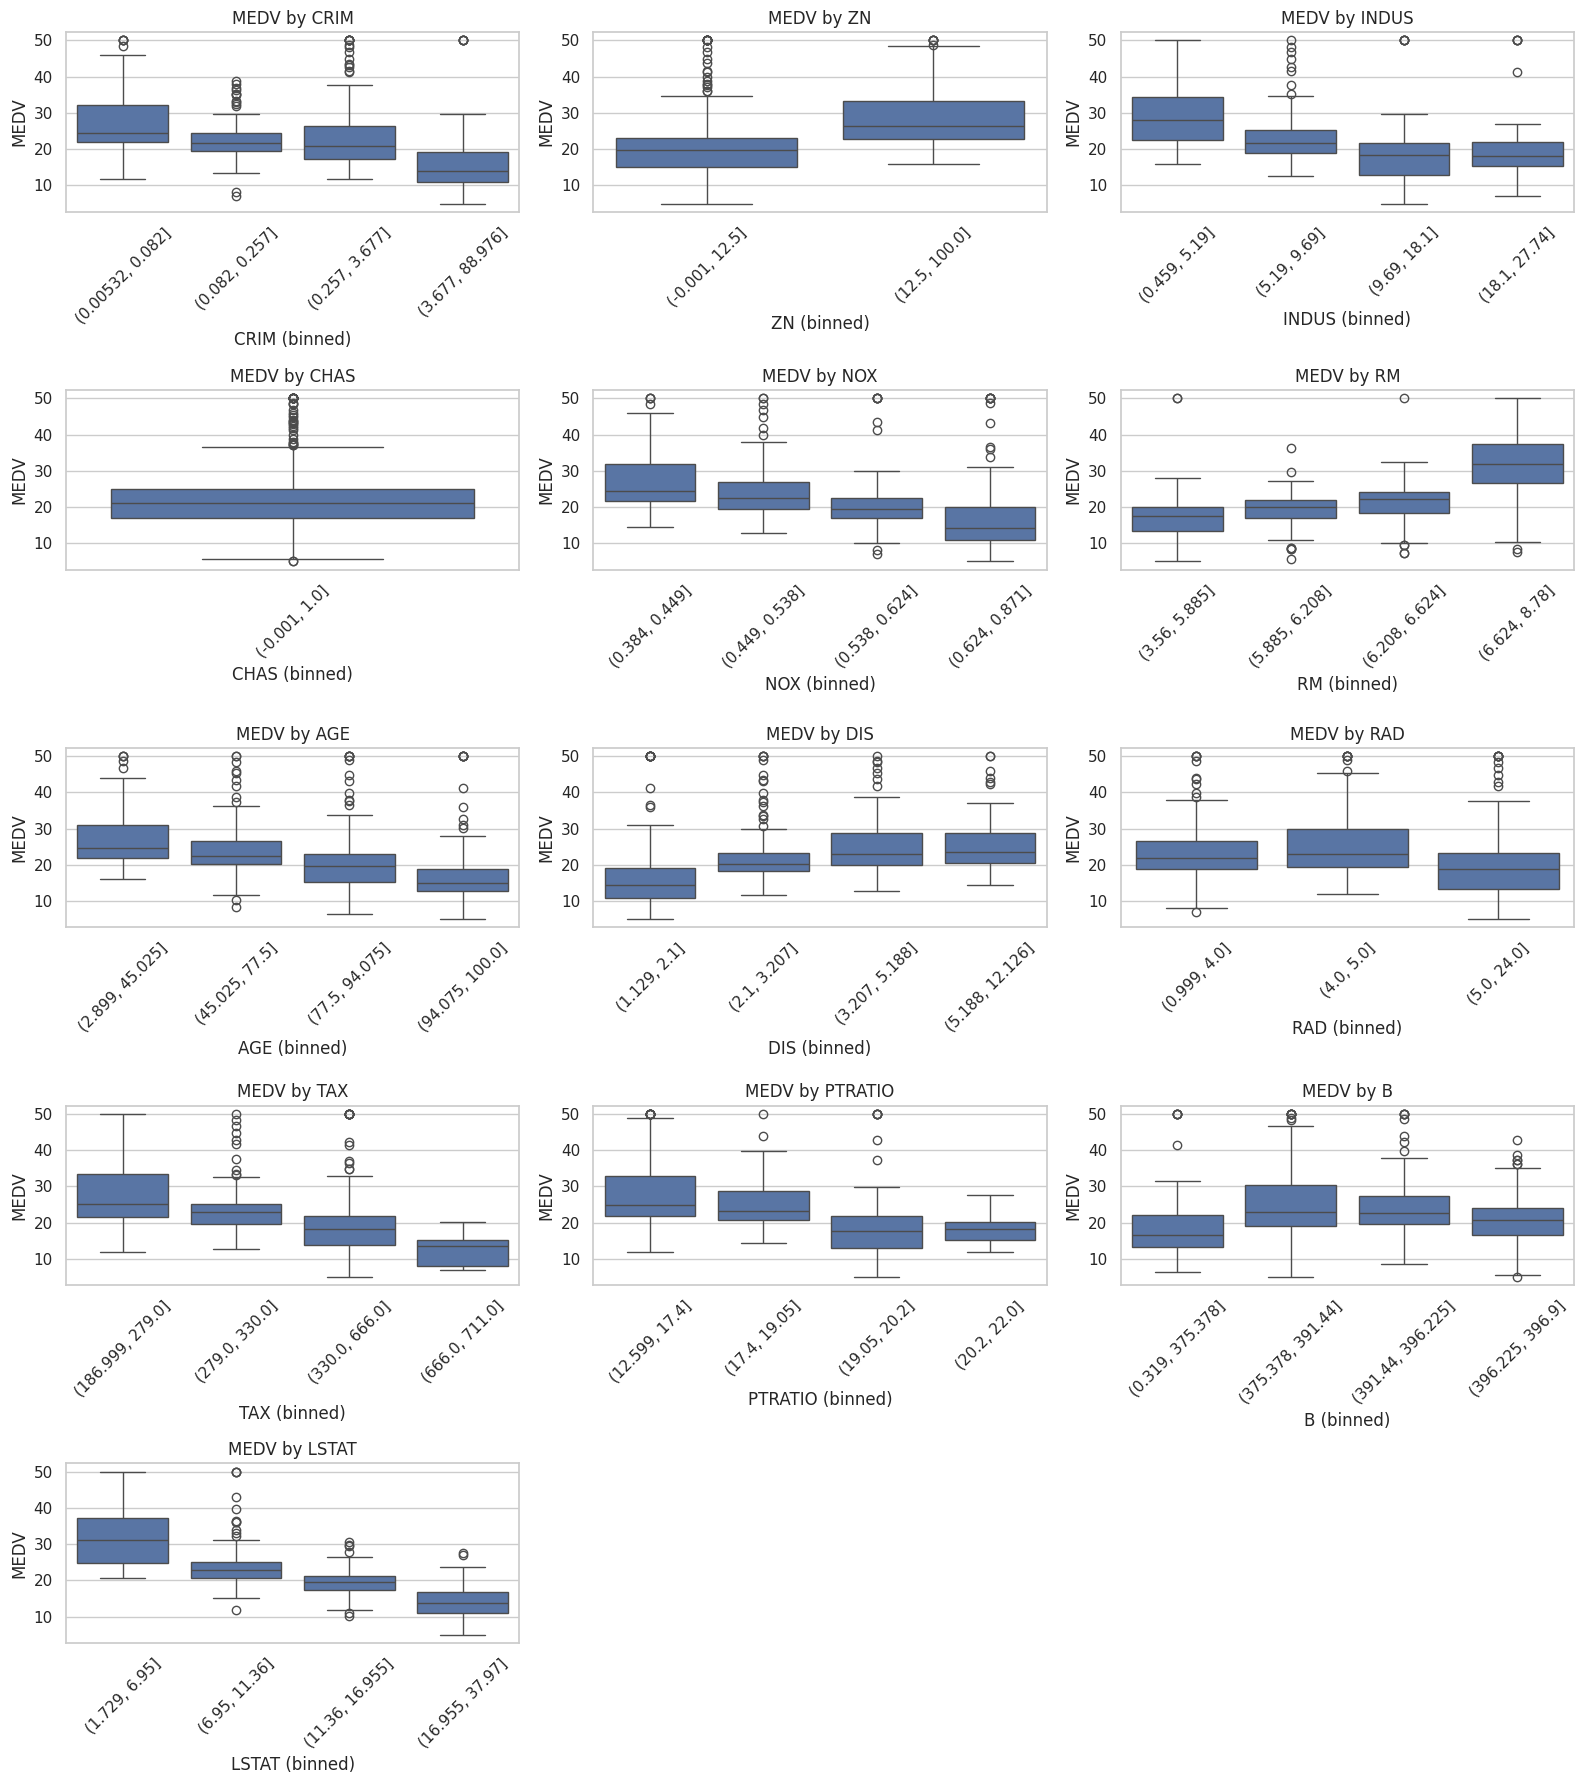

In [84]:
#Box and Whisker Plot of the data
sns.set_theme(style="ticks", palette="pastel")
data = pd.read_csv('boston.csv')
columns_to_plot = data.columns
plt.figure(figsize=(16, 18))
sns.set(style="whitegrid")

for i, col in enumerate(columns_to_plot.drop('MEDV')):
    plt.subplot(5, 3, i + 1)
    data['bin_' + col] = pd.qcut(data[col], q=4, duplicates='drop')
    sns.boxplot(x='bin_' + col, y='MEDV', data=data)
    plt.title(f'MEDV by {col}')
    plt.xlabel(f'{col} (binned)')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()


In [ ]:
#Ttest of proximity to the Charles and home value
nears = df[df['CHAS'] == 1]
not_nears = df[df['CHAS'] == 0]

_, p = stats.ttest_ind(nears['MEDV'], not_nears['MEDV'])
p

7.390623170519905e-05

In [ ]:
#Chi-squared test of proximity to the Charles and home value
from scipy.stats import chi2_contingency

data['MEDV_cat'] = pd.qcut(data['MEDV'], 4, labels=False)

# Create a contingency table
contingency_table = pd.crosstab(data['CHAS'], data['MEDV_cat'])

# Perform the chi-squared test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

chi2, p_value, dof, expected

(11.774389852497897,
 0.008197352226946975,
 3,
 array([[118.21541502, 120.0770751 , 117.28458498, 115.4229249 ],
        [  8.78458498,   8.9229249 ,   8.71541502,   8.5770751 ]]))

In [ ]:
#Ttest of crime and home value
t_stat, p_value = stats.ttest_ind(df['CRIM'], df['MEDV'])
print(t_stat)
print(p_value)

-33.79596814326492
4.1376062901253735e-168


In [ ]:
df = pd.read_csv('boston.csv')
data = pd.read_csv('boston.csv')

x = data['CRIM'].tolist()
y = data['MEDV'].tolist()

x = smf.add_constant(x)

result = smf.OLS(df['MEDV'], df['CRIM']).fit()

print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.050
Model:                            OLS   Adj. R-squared (uncentered):              0.048
Method:                 Least Squares   F-statistic:                              26.63
Date:                Wed, 01 May 2024   Prob (F-statistic):                    3.56e-07
Time:                        22:11:28   Log-Likelihood:                         -2320.1
No. Observations:                 506   AIC:                                      4642.
Df Residuals:                     505   BIC:                                      4646.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

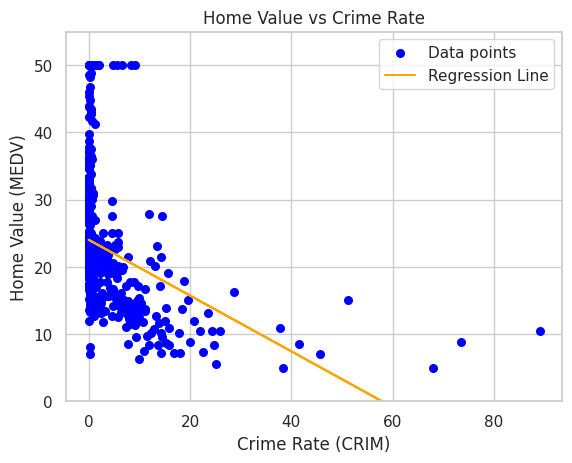

In [ ]:
#add a prediction
#multiple linear regression

#Simple Linear Regression 1: Crime Rate vs. Home Value
def simple_linear_regression(x, y):
    n = np.size(x)
    m_x, m_y = np.mean(x), np.mean(y)
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
    return (b_0, b_1)

# Compute regression coefficients with flipped variables
coefficients = simple_linear_regression(df['CRIM'], df['MEDV'])

# Plot regression line with flipped variables
def plot_regression_line(x, y, b):
    plt.scatter(x, y, color = "blue", marker = "o", s = 30, label='Data points')
    y_pred = b[0] + b[1]*x
    plt.plot(x, y_pred, color = "orange", label='Regression Line')
    plt.xlabel('Crime Rate (CRIM)')
    plt.ylabel('Home Value (MEDV)')
    plt.ylim(bottom=0, top=max(y.max(), y_pred.max())*1.1)
    plt.title('Home Value vs Crime Rate')
    plt.legend()
    plt.show()

plot_regression_line(df['CRIM'], df['MEDV'], coefficients)

In [ ]:
#Ttest of Student-Teacher Ratio and Home Value
t_stat, p_value = stats.ttest_ind(df['PTRATIO'], df['MEDV'])
print(t_stat)
print(p_value)

-9.706959605319538
2.332589698522123e-21


In [ ]:
df = pd.read_csv('boston.csv')
data = pd.read_csv('boston.csv')

x = data['PTRATIO'].tolist()
y = data['MEDV'].tolist()

x = smf.add_constant(x)

result = smf.OLS(df['MEDV'], df['PTRATIO']).fit()

print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.805
Model:                            OLS   Adj. R-squared (uncentered):              0.805
Method:                 Least Squares   F-statistic:                              2088.
Date:                Wed, 01 May 2024   Prob (F-statistic):                   1.51e-181
Time:                        22:11:28   Log-Likelihood:                         -1919.1
No. Observations:                 506   AIC:                                      3840.
Df Residuals:                     505   BIC:                                      3844.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

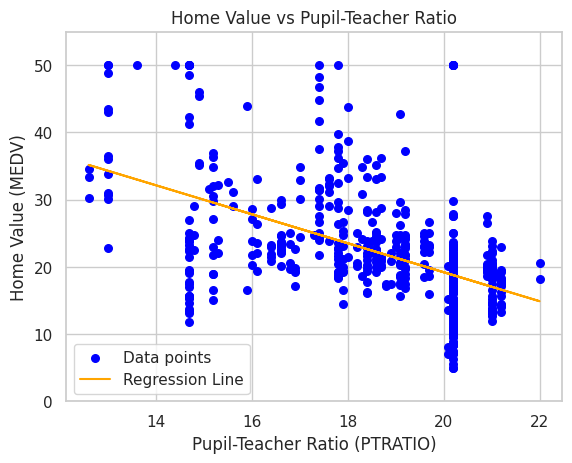

In [ ]:
#Simple Linear Regression 2: Student-Teacher Ratio vs. Home Value
def simple_linear_regression(x, y):
    n = np.size(x)
    m_x, m_y = np.mean(x), np.mean(y)
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
    return (b_0, b_1)

# Compute regression coefficients with flipped variables
coefficients = simple_linear_regression(df['PTRATIO'], df['MEDV'])

# Plot regression line with flipped variables
def plot_regression_line(x, y, b):
    plt.scatter(x, y, color = "blue", marker = "o", s = 30, label='Data points')
    y_pred = b[0] + b[1]*x
    plt.plot(x, y_pred, color = "orange", label='Regression Line')
    plt.xlabel('Pupil-Teacher Ratio (PTRATIO)')
    plt.ylabel('Home Value (MEDV)')
    plt.ylim(bottom=0, top=max(y.max(), y_pred.max())*1.1)
    plt.title('Home Value vs Pupil-Teacher Ratio')
    plt.legend()
    plt.show()

plot_regression_line(df['PTRATIO'], df['MEDV'], coefficients)

In [ ]:
#Ttest of Nitric Oxide Concentration and Home Value
t_stat, p_value = stats.ttest_ind(df['NOX'], df['MEDV'])
print(t_stat)
print(p_value)

-53.75019651593932
1.6249099761951157e-298


In [ ]:
df = pd.read_csv('boston.csv')
data = pd.read_csv('boston.csv')

x = data['NOX'].tolist()
y = data['MEDV'].tolist()

x = smf.add_constant(x)

result = smf.OLS(df['MEDV'], df['NOX']).fit()

print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.763
Model:                            OLS   Adj. R-squared (uncentered):              0.763
Method:                 Least Squares   F-statistic:                              1626.
Date:                Wed, 01 May 2024   Prob (F-statistic):                   5.53e-160
Time:                        22:11:29   Log-Likelihood:                         -1968.9
No. Observations:                 506   AIC:                                      3940.
Df Residuals:                     505   BIC:                                      3944.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

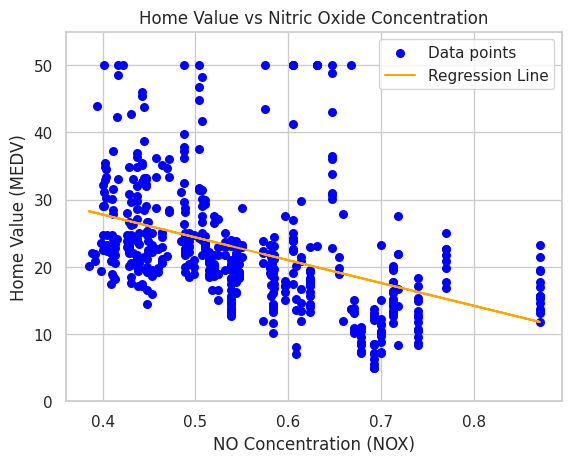

In [ ]:
#Simple Linear Regression 3: Nitric Oxide Concentration vs. Home Value
def simple_linear_regression(x, y):
    n = np.size(x)
    m_x, m_y = np.mean(x), np.mean(y)
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
    return (b_0, b_1)

# Compute regression coefficients with flipped variables
coefficients = simple_linear_regression(df['NOX'], df['MEDV'])

# Plot regression line with flipped variables
def plot_regression_line(x, y, b):
    plt.scatter(x, y, color = "blue", marker = "o", s = 30, label='Data points')
    y_pred = b[0] + b[1]*x
    plt.plot(x, y_pred, color = "orange", label='Regression Line')
    plt.xlabel('NO Concentration (NOX)')
    plt.ylabel('Home Value (MEDV)')
    plt.ylim(bottom=0, top=max(y.max(), y_pred.max())*1.1)
    plt.title('Home Value vs Nitric Oxide Concentration')
    plt.legend()
    plt.show()

plot_regression_line(df['NOX'], df['MEDV'], coefficients)

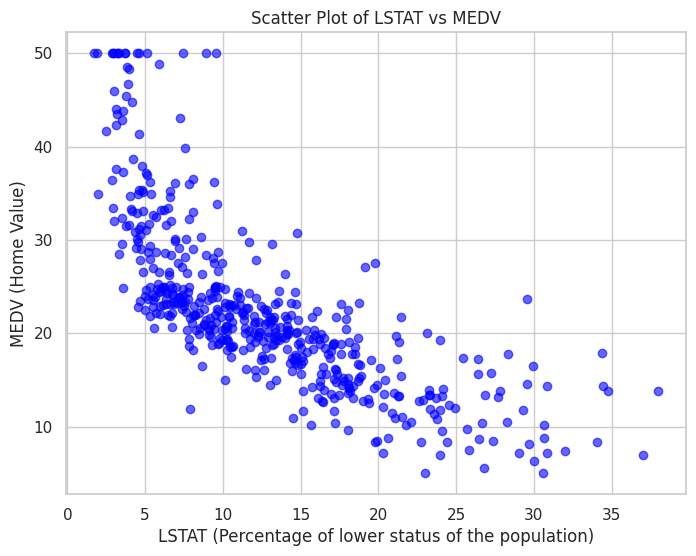

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of LSTAT vs MEDV
plt.figure(figsize=(8, 6))
plt.scatter(df['LSTAT'], df['MEDV'], color='blue', alpha=0.6)
plt.title('Scatter Plot of LSTAT vs MEDV')
plt.xlabel('LSTAT (Percentage of lower status of the population)')
plt.ylabel('MEDV (Home Value)')
plt.grid(True)
plt.show()

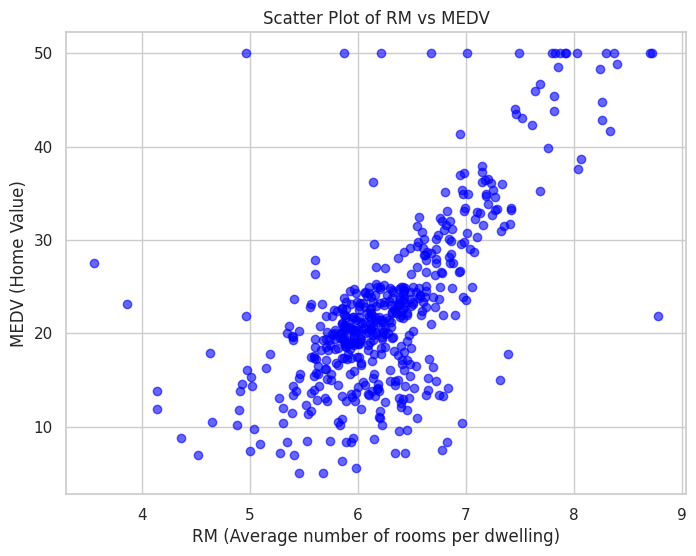

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of RM vs MEDV
plt.figure(figsize=(8, 6))
plt.scatter(df['RM'], df['MEDV'], color='blue', alpha=0.6)
plt.title('Scatter Plot of RM vs MEDV')
plt.xlabel('RM (Average number of rooms per dwelling)')
plt.ylabel('MEDV (Home Value)')
plt.grid(True)
plt.show()


In [ ]:
#Decision Tree Regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import pandas as pd



X = df.iloc[:, :-1]
y = df["MEDV"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dtree_reg = DecisionTreeRegressor()
dtree_reg.fit(X_train, y_train)

y_pred = dtree_reg.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("Decision Tree Regressor R^2 score:", r2)

training_accuracy = dtree_reg.score(X_train, y_train)
print("Training accuracy:", training_accuracy)

Decision Tree Regressor R^2 score: 0.8744031768285787
Training accuracy: 1.0


In [ ]:
#gridsearch
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import pandas as pd
scaler = StandardScaler()
df_scaler = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

X = df_scaler.iloc[:, :-1]
y = df_scaler["MEDV"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_leaf': [1, 3, 5, 7],
    'ccp_alpha': [0.001, 0.01, 0.1, 1]
}

dtree_reg = DecisionTreeRegressor(random_state=42)

grid_search = GridSearchCV(estimator=dtree_reg, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)



Best Hyperparameters: {'ccp_alpha': 0.001, 'max_depth': 5, 'min_samples_leaf': 7}


In [ ]:
dtree_reg = DecisionTreeRegressor(max_depth=5, min_samples_leaf=7, ccp_alpha=0.001)
dtree_reg.fit(X_train, y_train)

y_pred = dtree_reg.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("Decision Tree Regressor R^2 score:", r2)

training_accuracy = dtree_reg.score(X_train, y_train)
print("Training accuracy:", training_accuracy)

Decision Tree Regressor R^2 score: 0.7574981523651677
Training accuracy: 0.8477858703187746


<function matplotlib.pyplot.show(close=None, block=None)>

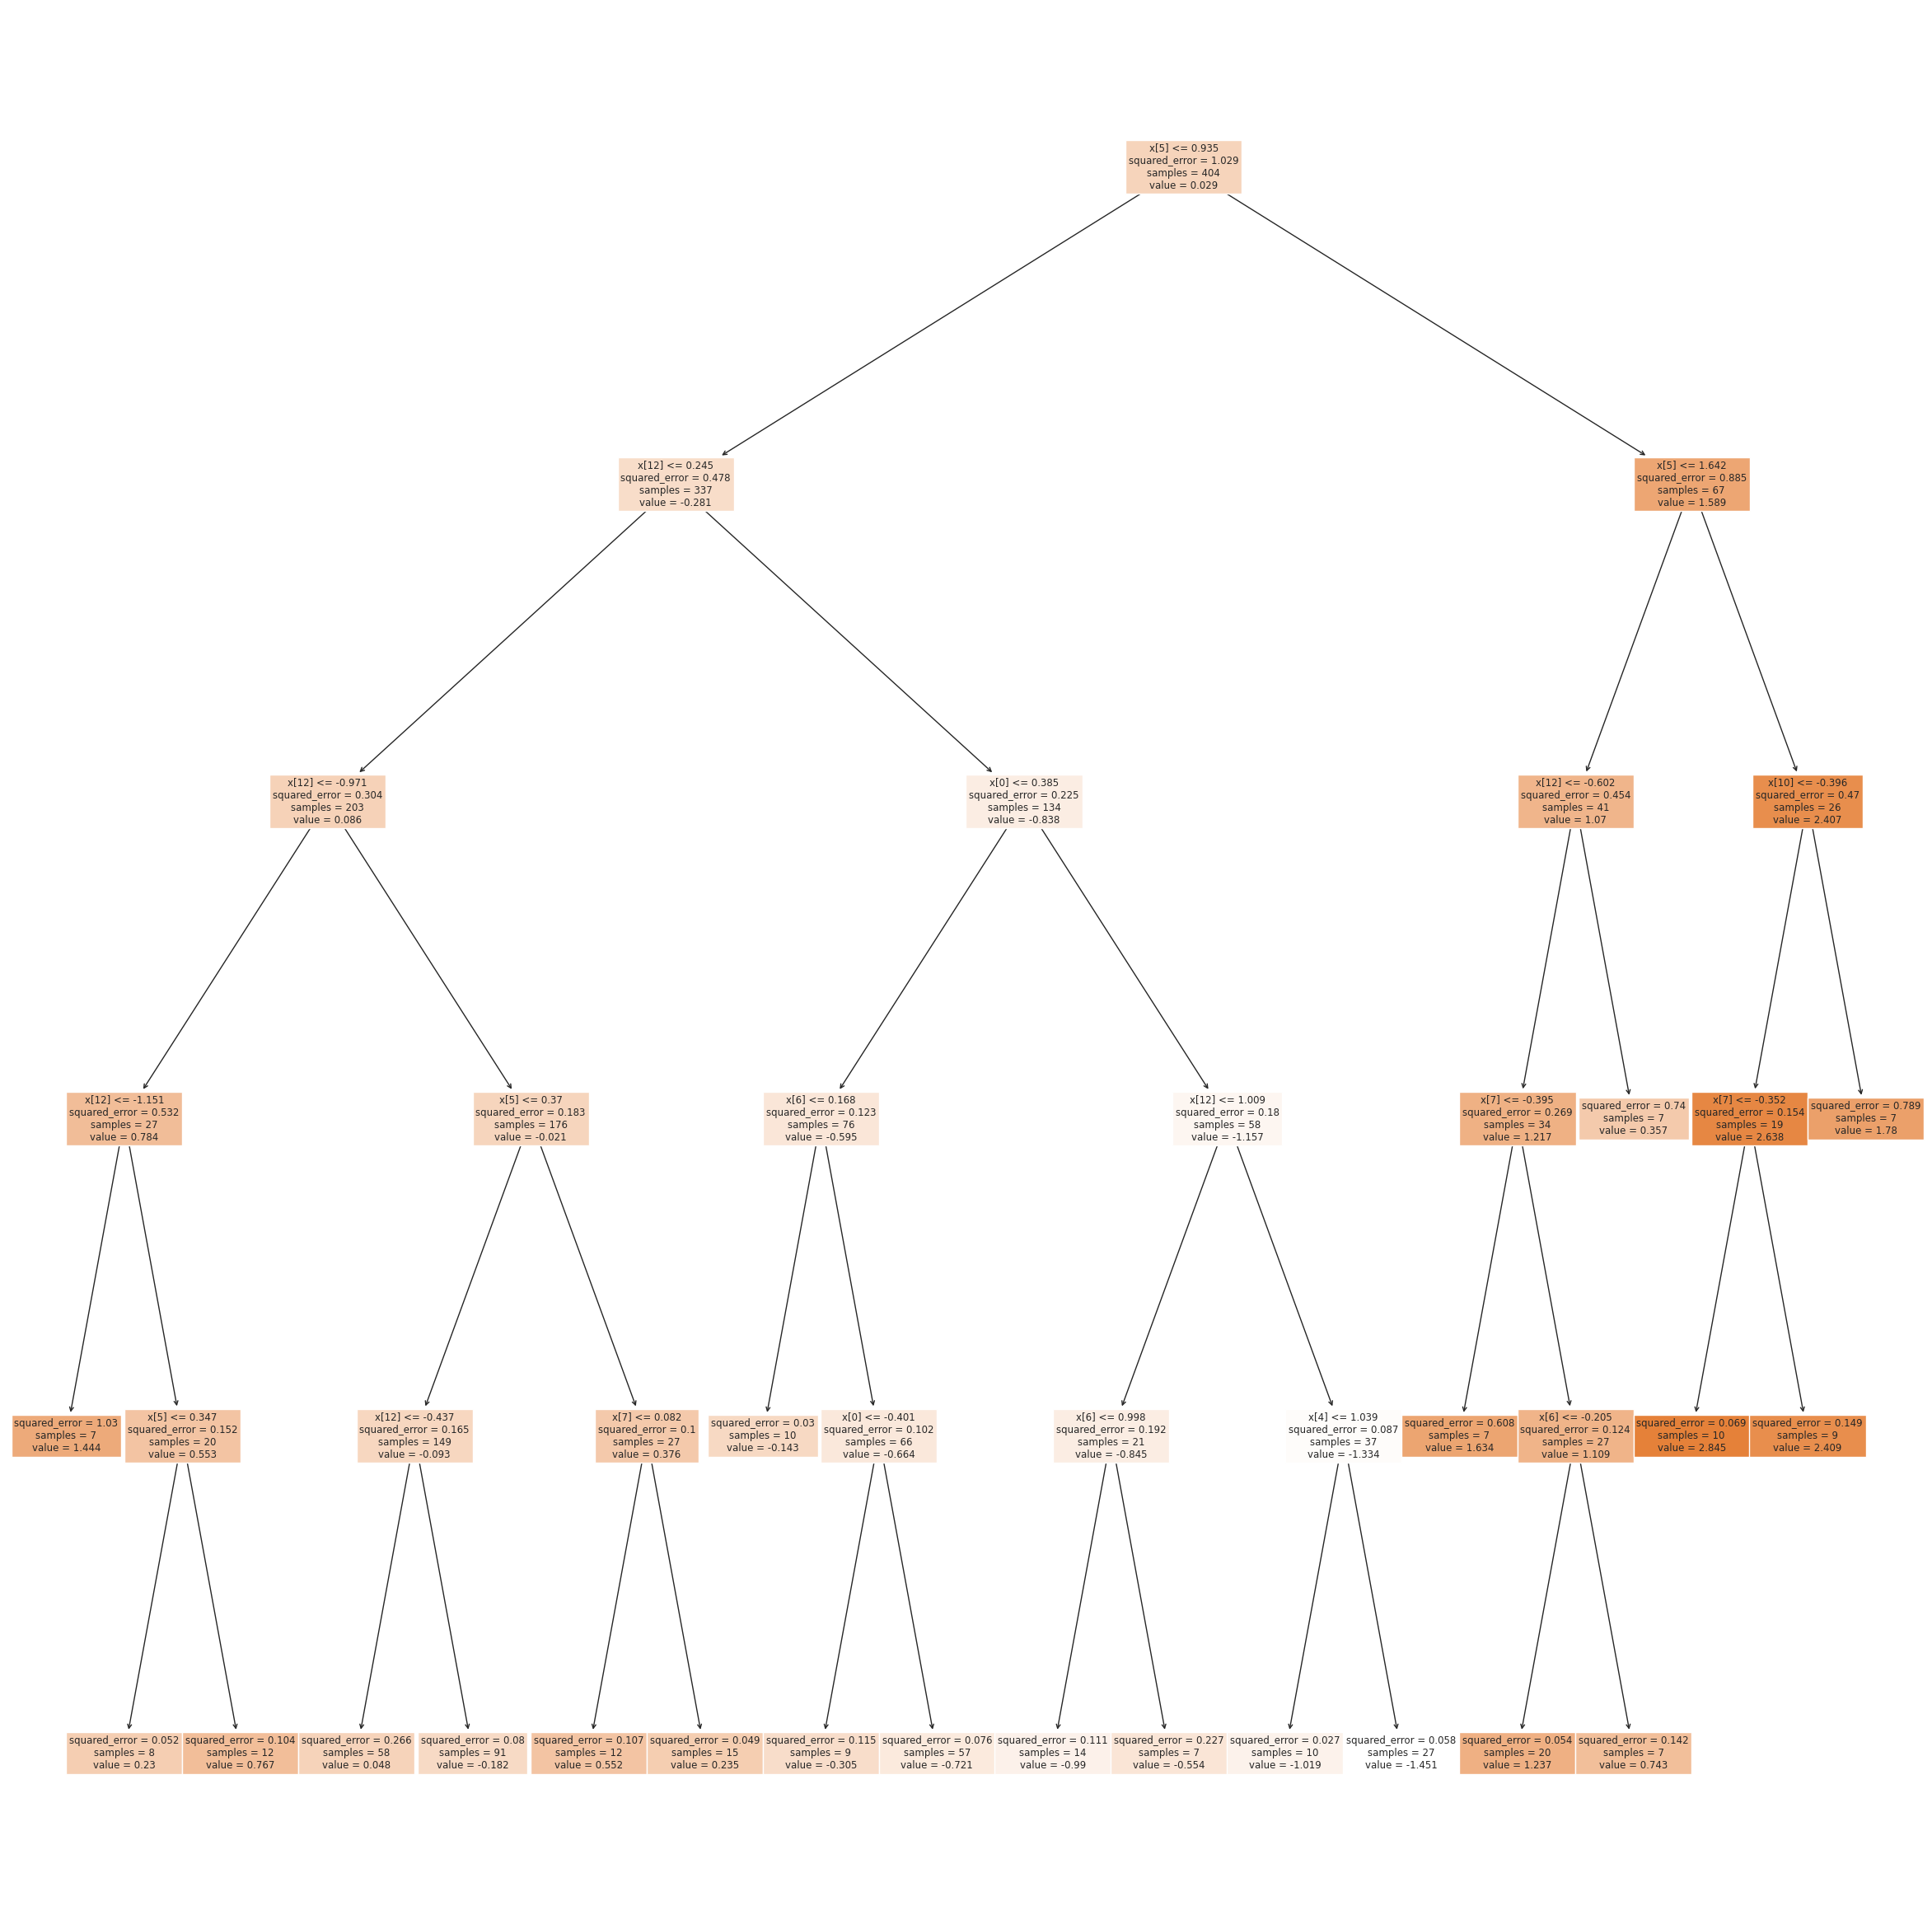

In [ ]:
#DecisonTreeRegression Plot
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(30,30))

plot_tree(dtree_reg, filled=True)
plt.show


In [ ]:
dtree_reg.fit(X_train, y_train)

# Now you can access the feature importances
importances = dtree_reg.feature_importances_
feature_names = df.columns
feature_importance_dict = dict(zip(feature_names, importances))
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
print(sorted_feature_importance)

[('RM', 0.6535753077729953), ('LSTAT', 0.27704352143168576), ('CRIM', 0.03323542387378962), ('AGE', 0.012798276591505925), ('PTRATIO', 0.010696813102059643), ('DIS', 0.00879251732805358), ('NOX', 0.0038581398999099855), ('ZN', 0.0), ('INDUS', 0.0), ('CHAS', 0.0), ('RAD', 0.0), ('TAX', 0.0), ('B', 0.0)]


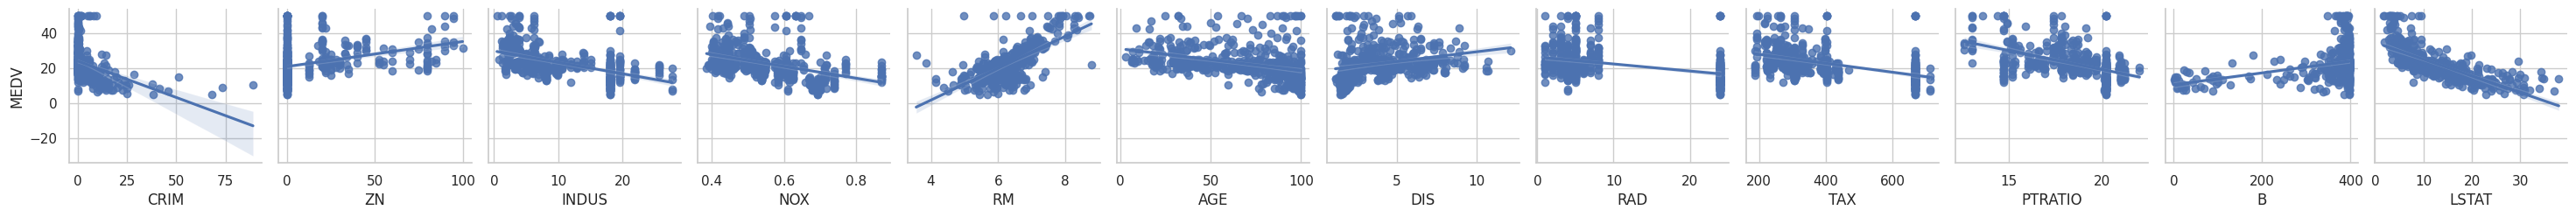

In [ ]:
#Seaborn Pairplot

sns.pairplot(df, x_vars=['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'], y_vars='MEDV', kind='reg')
plt.show()

In [ ]:
#Seaborn Violin Plots
data = pd.read_csv('boston.csv')

plt.figure(figsize=(15, 8))

specific_vars = ['CRIM', 'PTRATIO', 'NOX']

for i, var in enumerate(specific_vars):
    plt.subplot(1, 3, i + 1)
    sns.violinplot(x=var, y='MEDV', data=data, scale='width', cut=0)
    plt.title(f'Impact of {var} on MEDV', fontsize=14)
    plt.xlabel(var, fontsize=12)
    plt.ylabel('MEDV', fontsize=12)

plt.ylim(0, 60)

plt.tight_layout()
plt.show()


<ipython-input-77-78050948f1f5>:10: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x=var, y='MEDV', data=data, scale='width', cut=0)
<ipython-input-77-78050948f1f5>:10: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x=var, y='MEDV', data=data, scale='width', cut=0)
<ipython-input-77-78050948f1f5>:10: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x=var, y='MEDV', data=data, scale='width', cut=0)


In [ ]:
#Charles river proximity barplot

near_river_prices = df[df['CHAS'] == 1]['MEDV']
not_near_river_prices = df[df['CHAS'] == 0]['MEDV']

mean_near_river_price = near_river_prices.mean()
mean_not_near_river_price = not_near_river_prices.mean()

plt.figure(figsize=(8, 6))
plt.bar(['Near Charles River', 'Not Near Charles River'], [mean_near_river_price, mean_not_near_river_price], color=['blue', 'orange'])
plt.title('Mean Housing Prices by Proximity to Charles River')
plt.ylabel('Mean Housing Price ($1000s)')
plt.show()

In [ ]:
#Seaborn violin plot for Charles river proximity

plt.figure(figsize=(10, 6))
sns.violinplot(x='CHAS', y='MEDV', data=df)
plt.title('Distribution of Housing Prices by Proximity to Charles River')
plt.xlabel('Proximity to Charles River')
plt.ylabel('Median Value of Owner-Occupied Homes ($1000s)')
plt.xticks([0, 1], ['Not Near Charles River', 'Near Charles River'])
plt.show()

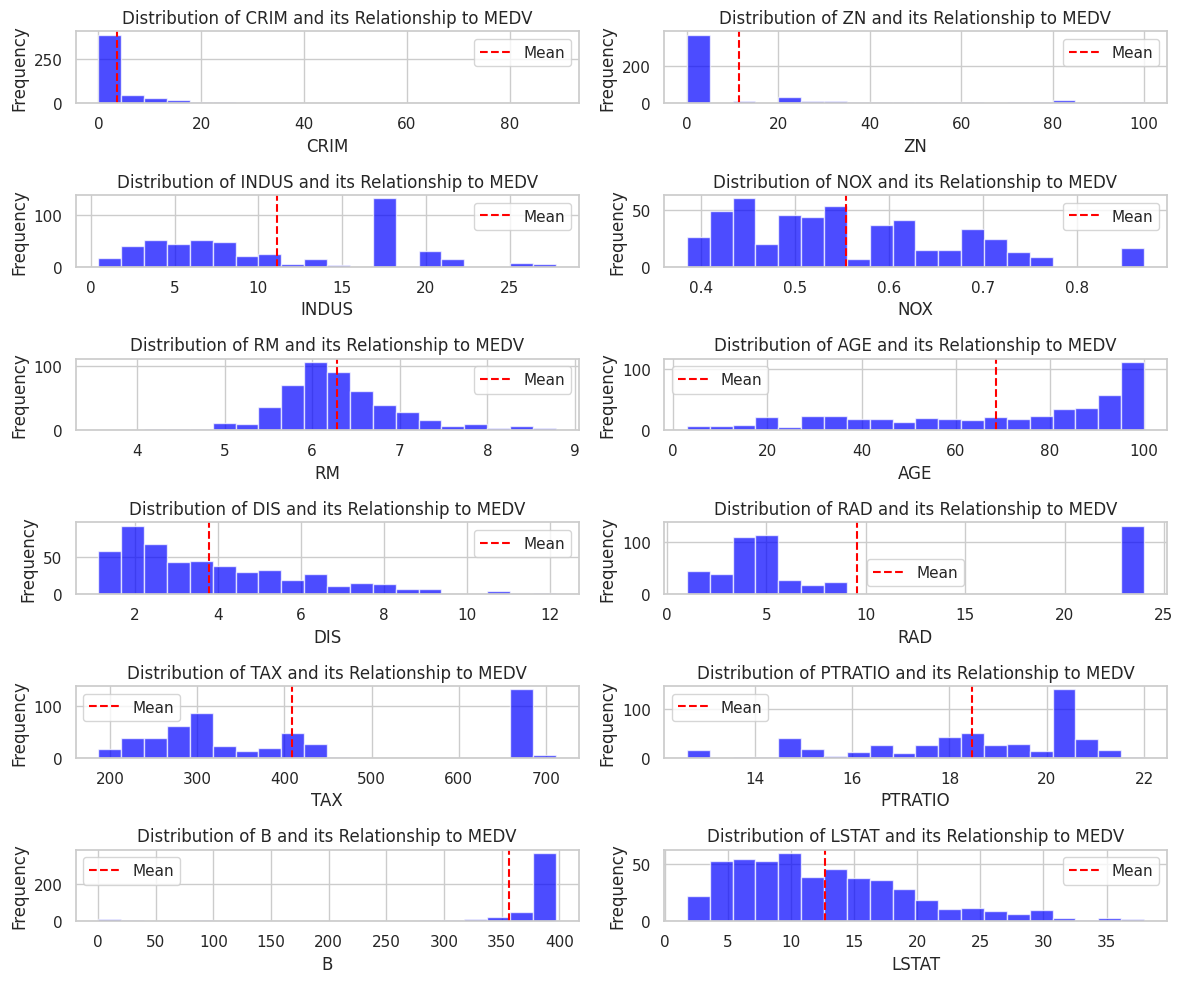

In [ ]:
#Histograms showing the impact of each variable on the price of houses
columns_to_plot = df.columns.drop(['CHAS', 'MEDV'])

num_cols = 2
num_rows = (len(columns_to_plot) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 10))

axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    axes[i].hist(df[column], bins=20, color='blue', alpha=0.7)
    axes[i].axvline(df[column].mean(), color='red', linestyle='dashed', linewidth=1.5, label='Mean')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Distribution of {column} and its Relationship to MEDV')
    axes[i].legend()

for j in range(len(columns_to_plot), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()